## Part 8 - Decision Tree and Random Forest

### Modèle - Decision Tree 

In [28]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
 
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [29]:
# Import dataset
dataset = pd.read_csv("dataset_CV_labelise_features1_200.csv", delimiter = ";")

In [30]:
dataset.head()

,CV_Sentences,Sentences_CV_clean,CV_Number,Sentence_line,Nb_tokens,%texte_lu,%texte_lu_fin_ligne,Is_alpha,Grammar,Label
0,SELMA LAFKIR CORDE 80 CODEUSE ENTHOUSIASTE,SELMA LAFKIR CORDE 80 CODEUSE ENTHOUSIASTE,CV_1,0,6,2.80,97.20,"[True, True, True, False, True, True]","['NOUN', 'PROPN', 'VERB', 'NUM', 'PROPN', 'PRO...",1
1,PROFIL,PROFIL,CV_1,1,1,3.27,96.73,[True],['NOUN'],0
2,PERSONNEL Je suis étudiante au lycée Condorcet.,PERSONNEL Je suis étudiante au lycée Condorcet.,CV_1,2,8,7.01,92.99,"[True, True, True, True, True, True, True, False]","['NOUN', 'PRON', 'AUX', 'ADJ', 'ADP', 'NOUN', ...",0
3,Je code depuis l'âge de 13 ans et j'aime créer...,Je code depuis l'âge de 13 ans et j'aime créer...,CV_1,3,24,18.22,81.78,"[True, True, True, False, True, True, False, T...","['PRON', 'VERB', 'ADP', 'DET', 'NOUN', 'ADP', ...",0
4,RÉALISATIONS,RÉALISATIONS,CV_1,4,1,18.69,81.31,[True],['NOUN'],0


In [31]:
dataset.shape

(5594, 10)

In [32]:
data_desc = dataset.describe(include='all')
display(data_desc)

,CV_Sentences,Sentences_CV_clean,CV_Number,Sentence_line,Nb_tokens,%texte_lu,%texte_lu_fin_ligne,Is_alpha,Grammar,Label
count,5594,5592,5594,5594.000000,5594.000000,5594.000000,5594.000000,5594,5594,5594.000000
unique,3805,3802,200,NaN,NaN,NaN,NaN,1626,2748,NaN
top,,,CV_10,NaN,NaN,NaN,NaN,[False],['NOUN'],NaN
freq,198,198,66,NaN,NaN,NaN,NaN,638,334,NaN
mean,NaN,NaN,NaN,15.673221,9.132285,50.470518,49.529483,NaN,NaN,0.037898
std,NaN,NaN,NaN,11.268076,10.914849,30.190027,30.190025,NaN,NaN,0.190966
min,NaN,NaN,NaN,0.000000,1.000000,0.240000,0.000000,NaN,NaN,0.000000
25%,NaN,NaN,NaN,7.000000,2.000000,24.190000,23.552500,NaN,NaN,0.000000
50%,NaN,NaN,NaN,14.000000,5.000000,49.530000,50.470000,NaN,NaN,0.000000
75%,NaN,NaN,NaN,23.000000,12.000000,76.447500,75.810000,NaN,NaN,0.000000


In [33]:
display(100*dataset.isnull().sum()/dataset.shape[0])

CV_Sentences           0.000000
Sentences_CV_clean     0.035753
CV_Number              0.000000
Sentence_line          0.000000
Nb_tokens              0.000000
%texte_lu              0.000000
%texte_lu_fin_ligne    0.000000
Is_alpha               0.000000
Grammar                0.000000
Label                  0.000000
dtype: float64

## Preprocessing

1. Separate target variable Y from features X

In [34]:
dataset["Label"].unique()

array([1, 0], dtype=int64)

In [35]:
dataset = dataset.loc[(dataset['CV_Sentences'] != "#NOM?"),:]

In [36]:
dataset.shape 

(5416, 10)

In [37]:
dataset = dataset.loc[(dataset['CV_Sentences'] != ":"),:]

In [38]:
dataset.shape

(5412, 10)

In [39]:
dataset = dataset.dropna(axis =0, how = 'any')

In [40]:
dataset.shape

(5410, 10)

In [41]:
display(100*dataset.isnull().sum()/dataset.shape[0])

CV_Sentences           0.0
Sentences_CV_clean     0.0
CV_Number              0.0
Sentence_line          0.0
Nb_tokens              0.0
%texte_lu              0.0
%texte_lu_fin_ligne    0.0
Is_alpha               0.0
Grammar                0.0
Label                  0.0
dtype: float64

In [42]:
print("Separating labels from features...")
col_list = ['CV_Sentences',"Sentences_CV_clean","CV_Number", "Is_alpha", "Grammar", "Label"]
target_variable = "Label"

X = dataset.drop(col_list, axis = 1)
y = dataset.loc[:,target_variable]

print('y : ')
print(y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
y : 
0    1
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

X :
   Sentence_line  Nb_tokens  %texte_lu  %texte_lu_fin_ligne
0              0          6       2.80                97.20
1              1          1       3.27                96.73
2              2          8       7.01                92.99
3              3         24      18.22                81.78
4              4          1      18.69                81.31


In [43]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['Sentence_line', 'Nb_tokens', '%texte_lu', '%texte_lu_fin_ligne']
Found categorical features  []


In [44]:
# Divide dataset Train set & Test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [45]:
# Create pipeline for numeric features
numeric_transformer = SimpleImputer(strategy='mean')

In [46]:
# Create pipeline for categorical features
categorical_transformer = OneHotEncoder(drop='first')

In [47]:
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [48]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5]) # MUST use this syntax because X_train is a numpy array and not a pandas DataFrame anymore
print()
# Label encoding
print("Encoding labels...")
print(y_train.head())
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
print("...Done")
print(y_train[0:5])

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head()) 
X_test = preprocessor.transform(X_test) # Don't fit again !! The test set is used for validating decisions
# we made based on the training set, therefore we can only apply transformations that were parametered using the training set.
# Otherwise this creates what is called a leak from the test set which will introduce a bias in all your results.
print('...Done.')
print(X_test[0:5,:]) # MUST use this syntax because X_test is a numpy array and not a pandas DataFrame anymore
print()
# Label encoding
print("Encoding labels...")
print(y_test[0:5])
y_test = encoder.transform(y_test)
print("...Done")
print(y_test[0:5])

Performing preprocessings on train set...
...Done.
[[25.    1.   45.85 54.15]
 [14.    6.   76.08 23.92]
 [17.    3.   47.06 52.94]
 [11.    1.   27.   73.  ]
 [ 6.    9.   20.78 79.22]]

Encoding labels...
351     0
4215    0
990     0
5377    0
628     0
Name: Label, dtype: int64
...Done
[0 0 0 0 0]
Performing preprocessings on test set...
      Sentence_line  Nb_tokens  %texte_lu  %texte_lu_fin_ligne
5009              3         15      35.22                64.78
2701             13          2      36.42                63.58
3437             26          3      73.29                26.71
2990              5          3      46.59                53.41
2896             20          9      99.46                 0.54
...Done.
[[ 3.   15.   35.22 64.78]
 [13.    2.   36.42 63.58]
 [26.    3.   73.29 26.71]
 [ 5.    3.   46.59 53.41]
 [20.    9.   99.46  0.54]]

Encoding labels...
5009    0
2701    0
3437    0
2990    0
2896    0
Name: Label, dtype: int64
...Done
[0 0 0 0 0]


## Application de la DECISION TREE

In [56]:
# Perform grid search
print("Grid search...") 
classifier = DecisionTreeClassifier()

# Grid of values to be tested
params = {
    'max_depth': [4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 4, 8]
}
gridsearch = GridSearchCV(classifier, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 4}
Best validation accuracy :  0.9664980781485637


In [50]:
# Predictions on training set
print("Predictions on training set...")
y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(y_train_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on training set...")
y_train_proba = gridsearch.predict_proba(X_train)
print("...Done.")
print(y_train_proba)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Probabilities on training set...
...Done.
[[0.99181669 0.00818331]
 [0.99181669 0.00818331]
 [0.99181669 0.00818331]
 ...
 [0.99181669 0.00818331]
 [0.99181669 0.00818331]
 [0.99181669 0.00818331]]



In [51]:
# Predictions on test set
print("Predictions on test set...")
y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(y_test_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on test set...")
y_test_proba = gridsearch.predict_proba(X_test)
print("...Done.")
print(y_test_proba)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]

Probabilities on test set...
...Done.
[[0.97236982 0.02763018]
 [0.99181669 0.00818331]
 [0.99181669 0.00818331]
 ...
 [0.97236982 0.02763018]
 [0.99181669 0.00818331]
 [0.97236982 0.02763018]]



In [52]:
# Print scores
print("accuracy on training set : ", accuracy_score(y_train, y_train_pred))
print("accuracy on test set : ", accuracy_score(y_test, y_test_pred))
print()

print("f1-score on training set : ", f1_score(y_train, y_train_pred))
print("f1-score on test set : ", f1_score(y_test, y_test_pred))
print()

accuracy on training set :  0.9706561922365989
accuracy on test set :  0.967652495378928

f1-score on training set :  0.5694915254237288
f1-score on test set :  0.5070422535211268



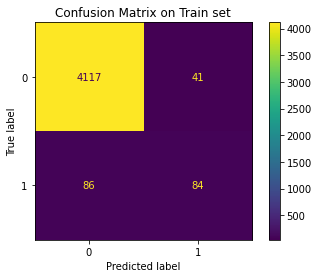

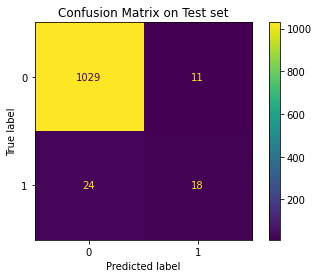

In [53]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gridsearch, X_train, y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gridsearch, X_test, y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

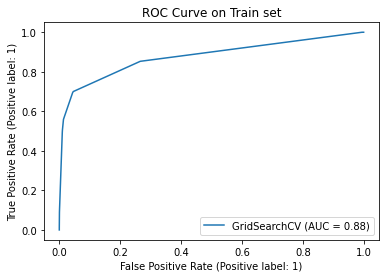

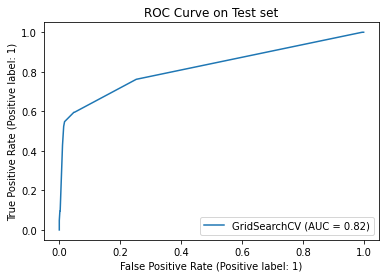

In [54]:
# Visualize ROC curves
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Train set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(gridsearch, X_train, y_train, ax=ax) # RocCurveDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Test set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(gridsearch, X_test, y_test, ax=ax) # RocCurveDisplay from sklearn
plt.show() 

## Application de la RANDOM FOREST